# <center>第四章 numpy基础</center>


# 4.1numpy的基本数据结构

## 1.多维数组

### 1.1一维数组

In [2]:
import numpy as np

#一维数组
arr=np.array([1,3,3,4,4])
arr.dtype
arr.astype(np.float64)
arr.dtype
#等差数列
np.linspace(0,5,3)

#等比数列-np.logspace(start,stop,num,base是底数)
np.logspace(2,7,6,base=2)

dtype('int32')

array([1., 3., 3., 4., 4.])

dtype('int32')

array([0. , 2.5, 5. ])

array([  4.,   8.,  16.,  32.,  64., 128.])

### 1.2多维数组

In [2]:
import numpy as np

my_arr=np.arange(100)
#产生若干个服从正态分布的数
data=np.random.randn(2,3)#数组的长度和维数
data.size
data.shape
data.dtype
data.ndim#维度
data.itemsize#每个元素字节数
data.nbytes#元素在内存中占用的字节数
list(data.flat)#data.flat将data变为一维，返回迭代器
np.random.normal(1,4,(100,100))

#将list转换为array对象
a=[[1,3,4],[2,4,4]]
b=np.array(a)
print(b)

#zeros和ones创建全为0或1的数组
np.ones((2,3))#输入为元组
np.zeros((2,2))

#np.eye创建单位矩阵
np.eye(3)

#用fromfunction创建数组
fun=lambda x,y:(x+1)*(y+1)
np.fromfunction(fun,(4,4))

### 1.3结构数组

In [14]:
goodlist=np.dtype([('name',np.str_,50),('location',np.str_,30),('price',np.float16),('volume',np.int32)])
good=np.array([('gree','jd.com',6245,1),
               ('sony','amazon.com',3210,2),
               ('apple','tmall.com',12388,1)],dtype=goodlist)
good.dtype
good.itemsize
good.nbytes

978

numpy的数据类型：

| 类型 | 代码 | 说明 |
|:-:|:-:|:-:|
| int8,uint8 | i1,u1 | 有符号和无符号的8位整数|
| int16,uint16 | i2,u2 | 16位整数 |
| int32,uint32 | i4,u4 | 32位整数 |
| int64,uint64 | i8,u8 | 64位整数 |
| float16 | f2 | 半精度浮点数 |
| float32 | f4或者f | 标准单精度浮点数 |
| float64 | f8或者d | 标准双精度浮点值 |
| bool | ? | 存储布尔类型

## 2.numpy数组运算

In [ ]:
#numpy数组的运算
#大小相同的数组之间的任何运算都会将运算运用到元素级
import numpy as np

arr=np.array([[1,3,4,4],[5,6,7,8]])
arr
arr.dtype
#可以写类似于'float32','int64'之类的字符
float_arr=arr.astype('float')
#对应元素相乘，不是矩阵的乘法
arr*arr
arr-1
arr/3
arr//3
#数值与标量之间的运算会将标量传播到各个元素
1/arr
#大小相同的数组之间的比较会生成布尔数组
import numpy as np
a=np.array([3,3,4])
b=np.array([4,5,1])
c=a>b
a[c]

## 3.array的索引和切片

### 3.1基本索引

In [ ]:
import numpy as np

arr=np.arange(100)
arr[5]

#赋值修改
arr[5:8]=[3,3,3]
#跟列表最重要的区别是数组切片是原始数组的视图，这意味着数据不会被复制，视
# 图上的任何修改都会反应到原始数据中来
arr=np.arange(100)
arrt=arr[1:10]
arr_get=arrt[3:6]
#当我修改arr_get中的值时，变动也会体现在原始数组arr中去
#切片会给数组中的所有元素赋值
arr_get[:]=64
arr

#如果只是想获得ndarray切片的一份副本而非视图，就需要明确的复制操作array.copy()
paste=arr[5:8].copy()

### 3.2高维数组索引

In [ ]:
import numpy as np

#高维数组索引
array_2d=np.array([[1,3,4],[2,3,4],[3,6,7]])
array_2d[2]
#下面2种索引方式是等价的
array_2d[0,2]
#只输入一个相当于对行索引
array_2d[0][2]
array_2d[0:,1]

#下面两种结果不同
a=np.arange(1,100)
b=a.reshape(10,10)#注意reshape()不会改变原视图

b[:,2]#输出1维数组
b[:,[2]]#输出10*1维数组

#这种索引不包括结尾数字的
b[:,2:3]#输出10*1维数组
b[:,[2,3]]#10X2的数组

### 3.3布尔型索引

> <font color=#00FGFF>布尔型索引的长度必须跟被索引的轴长度一致</font>

In [ ]:
import numpy as np

names=np.array(['Bob','Mary','Jack','Bob','Navi','Ghost'])
data=np.random.randn(6,4)
names.dtype
data[names=='Bob']
data[names=='Bob',2]
buer=names=='Bob'
buer=~buer
date[buer]
#取至少两个名字
mask=(names=='Bob')|(names=='Navi')
data[mask]

### 3.4 Fancy indexing花式索引

> 是指利用整数数组进行索引。和切片不一样，总是将结果复制到新数组中

In [5]:
import numpy as np

arr=np.random.randint(0,4,(8,4))
print(arr)
print(arr[[4,3,0,6]])

#一次传入多个索引数组
print(arr[[1,3,7,3],[0,3,3,2]])

#数组转置
arr.T

[[0 1 2 0]
 [0 2 0 1]
 [3 3 3 3]
 [1 3 0 2]
 [0 0 1 3]
 [2 2 2 0]
 [3 0 3 0]
 [0 2 2 1]]
[[0 0 1 3]
 [1 3 0 2]
 [0 1 2 0]
 [3 0 3 0]]
[0 2 1 0]


## 4.数组排序

In [15]:
import numpy as np

s=np.random.randint(0,100,15)
s.sort()#或者np.sort(s),这两种操作都会直接改变s
s.argsort()#返回排名

array([21, 34, 59, 94, 42, 82, 11,  4, 89, 64, 25, 33, 73,  5, 54])

## 5.数组组合

### 5.1水平组合-np.hstack
>各数组行数应该相等

In [18]:
import numpy as np

s1=np.random.randint(0,5,(4,3))
s2=np.random.randn(4,4)
np.hstack([s1,s2])

array([[ 1.        ,  3.        ,  4.        ,  0.88526653,  1.05373237,
        -0.7580484 ,  0.92355707],
       [ 1.        ,  2.        ,  0.        , -1.34064641,  1.69815597,
         0.0563325 , -0.01651125],
       [ 3.        ,  0.        ,  1.        , -2.67511182, -0.59065087,
        -0.48230434,  0.10663151],
       [ 3.        ,  3.        ,  3.        ,  0.76130585, -2.30602418,
         1.05718707,  0.41362557]])

### 5.2垂直组合-np.vstack
>列数应该相等

In [19]:
s1=np.random.randint(0,5,(4,3))
s2=np.random.randn(3,3)
np.vstack([s1,s2])

array([[ 0.        ,  3.        ,  4.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 1.        ,  2.        ,  2.        ],
       [ 1.        ,  4.        ,  0.        ],
       [-0.69962587,  0.12161376, -0.90159627],
       [ 0.03545835,  1.29782328,  0.368993  ],
       [-0.49602728, -0.97834997,  1.25374292]])

### 5.3深度组合
>把数组相同位置的数据组合在一起，要求参与合并的数组形状相同


In [22]:
s1=np.delete(np.random.randint(0,4,(4,4)),1,axis=0)
s2=np.random.randn(3,4)
np.dstack([s1,s2,s2])

array([[[ 0.00000000e+00, -4.55589045e-01, -4.55589045e-01],
        [ 3.00000000e+00,  1.23766295e+00,  1.23766295e+00],
        [ 3.00000000e+00, -3.33077766e-01, -3.33077766e-01],
        [ 1.00000000e+00, -5.73389693e-01, -5.73389693e-01]],

       [[ 2.00000000e+00,  8.19019995e-01,  8.19019995e-01],
        [ 2.00000000e+00, -1.30677152e+00, -1.30677152e+00],
        [ 3.00000000e+00, -1.40777228e+00, -1.40777228e+00],
        [ 0.00000000e+00, -1.79654334e-03, -1.79654334e-03]],

       [[ 2.00000000e+00,  7.38452698e-01,  7.38452698e-01],
        [ 3.00000000e+00,  2.91053631e-02,  2.91053631e-02],
        [ 3.00000000e+00,  2.31539469e-01,  2.31539469e-01],
        [ 1.00000000e+00,  1.03535920e+00,  1.03535920e+00]]])

## 6.数组分拆

### 6.1水平拆分

In [23]:
import numpy as np

s1=np.random.randn(3,3)
np.hsplit(s1,3)

[array([[-0.11057327],
        [ 0.93443505],
        [ 0.89291923]]), array([[ 0.33904146],
        [ 0.24125994],
        [-1.09700178]]), array([[-0.81993594],
        [ 0.04985951],
        [-2.86756416]])]

# 4.2 通用函数(ufunc)

> 是一种对ndarray中的数据执行元素级运算的函数

## 1.快速的元素级别组函数

In [ ]:
import numpy as np

arr=np.arange(10)
arr=arr.reshape((2,5))
np.sqrt(arr)
arr1=np.random.randn(2,5)
maxi=np.maximum(arr,arr1)#返回元素中的最大值
remain,whole_part=np.modf(arr1)
d=np.log(arr1)
np.isnan(d)#返回bool
x=np.random.randn(5)
y=np.random.randn(5)
#meshgrid生成坐标
xs,ys=np.meshgrid(x,y)
distance=np.sqrt(xs**2+ys**2)


#生成多项式
p=np.poly1d([3,-1,3,3])#幂指数从高到低
p.deriv(m=2)#二阶导
p.integ(m=1)#一阶积分
x=np.arange(5)
p(x)

### 2.将条件逻辑表达为数组运算

In [ ]:
import numpy as np

x=np.random.randn(5)
y=np.random.randn(5)
#这里的x和y是标量也行的
result=np.where(x>0,x,y)

###  3.数学和统计方法

>通过数组上的一组数学函数对整个数组或者某个轴向的数据进行统计计算

In [ ]:
arr=np.random.binomial(5,0.5,(5,5))
arr.mean()
np.mean(arr)
arr.sum
np.sum(arr)
np.sum(arr,axis=0)
np.sum(arr,1)
np.cumsum(arr,1)
np.cumprod(arr,1)
np.std(arr,0)
np.std(arr,1)
np.var(arr,0)
np.var(arr,1)
np.argmin(arr,1)

### 4.用于布尔型数组的方法

In [ ]:
import numpy as np

arr=np.random.randn(100)
bo=arr>0
#bo用于测试数组中是否存在一个或多个true
#all检查数组中所有的值是否都是true
bo.any(axis=1)
bo.all(axis=0)

### 5.排序

In [ ]:
import numpy as np

arr=np.random.binomial(5,0.2,(5,5))
arr.shape
#sort会直接改变原数组，默认按行排序
#输入数字指定轴
arr.sort(axis=0)

### 6.唯一化

In [ ]:
import numpy as np

#最常用的可能要数np.unique了，用于找出数组中的唯一值
names=np.array(['Bob','Mary','Joy','Teddy','Bob'])
#获取其中唯一元素，加参数1会显示元素索引
np.unique(names,1)

#另一个函数np.in1d测试一个数组中的值在另一个数组中的成员资格
value=np.array([6,0,0,3,2,5,6])
np.in1d(value,[2,3,4])

方法 | 说明
:-: | :-:
unique(x) | 计算x中的唯一元素，并返回有序结果
intersect1d(x,y) | 计算x和y的公共元素，并返回有序结果
union1d(x,y) |计算x和y的并集，并返回有序结果
in1d(x,y) | 得到一个表示'x的元素是否包含于y'的布尔型数组
setdiff1d(x,y) | 集合的差，即元素在x中且不再y中
setxor1d | 集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素


### 7.线性代数

In [ ]:
#numpy.dot矩阵的乘法
import numpy as np
x=np.random.randn(2,3)
y=np.random.randn(3,2)
np.dot(x,y)
np.dot(x,3)

#标准线性代数库
from numpy.linalg import inv,qr
x=np.random.randn(5,5)
inv(x)
np.dot(x,inv(x))
a,b=qr(x)

下表列出了一些最常用的线性代数函数

函数 | 说明
:-: | :-
diag | 以一维数组的形式返回对角线元素
trace | 矩阵的迹
det | 矩阵行列式
eig | 计算方阵的特征值和特征向量
inv | 计算方阵的逆
qr | 计算QR分解
solve | 解线性方程组Ax=b
lstsq | 计算Ax=b的最小二乘解

### 8.伪随机数

In [2]:
import numpy as np

help(np.random.normal)
sample=np.random.normal(loc=0,scale=1,size=(4,4))
from random import normalvariate
help(normalvariate)
sample1=normalvariate(0,1)
#更改随机数生成种子
np.random.seed(134)
np.random.uniform(1,4,(5,5))#生成均匀分布

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

NameError: name 'normalvarite' is not defined

### 9.随机漫步

<module 'matplotlib.pyplot' from 'D:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

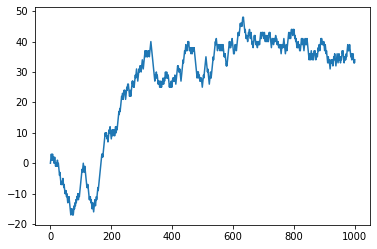

In [7]:
#通过内置的random模块以纯python的方式实现1000步
import random
import matplotlib.pyplot as plt

steps=[0]
for i in range(1000):
    step=1 if random.randint(0,1) else -1
    steps.append(steps[-1]+step)
plt.plot(steps)
plt

In [ ]:
#随机漫步的numpy实现
import numpy as np
import matplotlib.pyplot as pt

nsteps=1000
draws=np.random.randint(0,2,1000)
steps=np.where(draws>0,1,-1)
walk=steps.cumsum()
pt.plot(walk)
pt.show()

In [ ]:
#多个随机漫步
import numpy as np
import matplotlib.pyplot as pt

array=np.random.randint(0,2,(100,100))
array1=np.where(array>0,1,-1)
array2=array1.cumsum(1)
pt.plot(array2[0,:])
pt.show()

### appendix:部分numpy.random函数

| 函数 | 说明 |
| :---: | :--- |
| choice | choice(a,size,replace=True,p=None) |
| seed | 确定随机数生成器的种子 |
| permutation | 返回一个序列的随机排列 |
| shuffle | 对一个序列就地随机排列 |
| rand | 产生均匀分布的样本值 |
| randint | 从给定的上下限范围内随机地选取整数 |
| randn | 产生正态分布 |
| binomial | 产生二项分布的样本值 |
| normal | 产生正态分布的样本值 |
| uniform | 产生在[0,1)中均匀分布的样本值 |

<font color=#FF83FA>> 重要的Python库:<font></br>
    1. Scripy:专门解决科学计算中各种标准问题。包括scipy.integrate(数字积分和微分方程求解)
    2. scikit-learn通用机器学习包
    3. statsmodels 统计分析包